# Plot time series with Python seaborn

## Setup

In [1]:
# Import libraries
import pandas as pd
import seaborn as sns

%matplotlib inline
sns.set(rc={'figure.figsize':(12,8)})

In [2]:
# Read sample data, parsing date field
df = pd.read_csv('data/finance_data.csv', parse_dates=['Date'])
df.tail()

,Name,Date,Value
691,Nasdaq100,2020-05-13,9000.08
692,Nasdaq100,2020-05-14,9094.42
693,Nasdaq100,2020-05-15,9152.64
694,Nasdaq100,2020-05-18,9331.93
695,Nasdaq100,2020-05-19,9390.94


This dataset contains daily values for the Nasdaq 100 and Dow Jones indices, between 01/01/2019 and 19/05/2020. Which was quite an interesting period.

## Plot relative variation with emphasis on specific periods

In [3]:
# Normalize values to the first date
df['Var'] = (
    df
    .groupby('Name')
    .apply(lambda x: x['Value']/(x.head(1)['Value'].values))
    .values-1
)

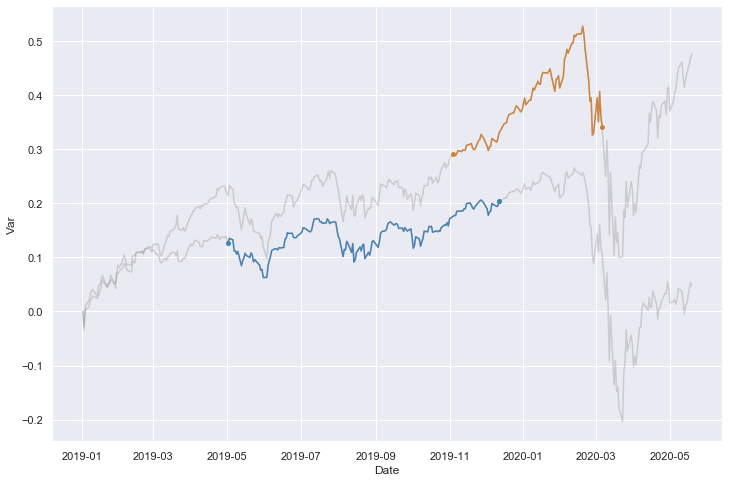

In [4]:
# Plot all values
sns.lineplot(data=df, x='Date', y='Var', units='Name', estimator=None, color='grey', alpha=0.3)

# Plot solid line within date range
sns.lineplot(data=df.query('Name == "Nasdaq100" & Date >= "2019-11-04" & Date <= "2020-03-06"'), 
             x='Date', y='Var', color='peru')
sns.lineplot(data=df.query('Name == "DowJones" & Date >= "2019-05-02" & Date <= "2019-12-12"'), 
             x='Date', y='Var', color='steelblue')

# Plot points at first and last date
sns.scatterplot(data=df.query('Name == "Nasdaq100" & Date in ["2019-11-04", "2020-03-06"]'), 
                x='Date', y='Var', color='peru')
sns.scatterplot(data=df.query('Name == "DowJones" & Date in ["2019-05-02", "2019-12-12"]'), 
                x='Date', y='Var', color='steelblue');

## Plot moving average

In [5]:
# Compute moving average over 15 days (centered)
df['MovAvg'] = (
    df
    .groupby('Name')
    .apply(lambda x: x['Var'].rolling(window=15, center=True).mean())
    .values
)

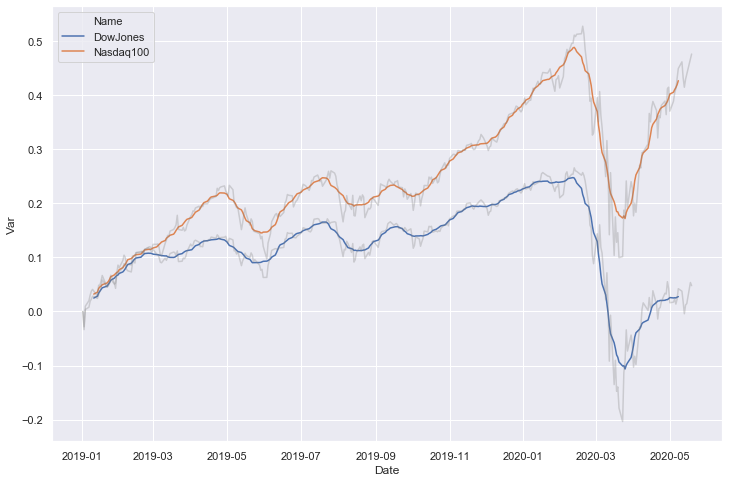

In [6]:
# Plot moving average
sns.lineplot(data=df, x='Date', y='MovAvg', hue='Name', linestyle='--')

# Plot daily values
sns.lineplot(data=df, x='Date', y='Var', units='Name', color='grey', estimator=None, alpha=0.3, legend=None);